In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Pima.csv',header=None)
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','output']

In [3]:
df.output = df.output.apply(str)

In [4]:
#Q.1.
if df.shape[0] == 768 and df.shape[1] == 9:
    print("Verified that data contains 768 rows and 9 columns")
else:
    print("Verified that data does not contain 768 rows and 9 columns")

Verified that data contains 768 rows and 9 columns


In [5]:
#Q.1. The following table describes the statistics of the features
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:xlabel='output', ylabel='Count'>

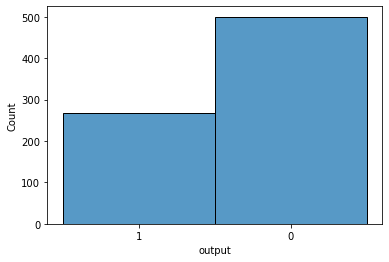

In [6]:
#Q.1. The following is the Histogram of the labels
import seaborn as sns
sns.histplot(data=df, x="output")

In [7]:
X_columns = df.columns.to_list()
X_columns.remove('output')

In [8]:
X = df[X_columns]
y = df['output']

In [9]:
#Q.2. This code splits the data in 80% training data and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def get_accuracy(X_train, y_train):
    mean_accuracy = []
    for i in range(1,16):
        neigh = KNeighborsClassifier(n_neighbors=i, metric="euclidean")
        mean_accuracy.append(cross_val_score(neigh, X_train, y_train.values.ravel(), cv=5,scoring="accuracy").mean())
        
    for i in range(len(mean_accuracy)):
        print("k = ",i+1, ", mean_accuracy=", mean_accuracy[i])

    
    data = {'k': [i+1 for i in range(len(mean_accuracy))],
            'mean_accuracy': mean_accuracy
           }

    df = pd.DataFrame(data,columns=['k','mean_accuracy'])
    df.plot(x ='k', y='mean_accuracy', kind = 'line')
    plt.show()

    return mean_accuracy

k =  1 , mean_accuracy= 0.6676795948287353
k =  2 , mean_accuracy= 0.6954551512728242
k =  3 , mean_accuracy= 0.6987338397974143
k =  4 , mean_accuracy= 0.7231107556977209
k =  5 , mean_accuracy= 0.7313074770091963
k =  6 , mean_accuracy= 0.7296681327469012
k =  7 , mean_accuracy= 0.7280287884846062
k =  8 , mean_accuracy= 0.7313074770091963
k =  9 , mean_accuracy= 0.7378248700519792
k =  10 , mean_accuracy= 0.7475543116086898
k =  11 , mean_accuracy= 0.7378248700519792
k =  12 , mean_accuracy= 0.7442889510862322
k =  13 , mean_accuracy= 0.7459282953485273
k =  14 , mean_accuracy= 0.7491536718645875
k =  15 , mean_accuracy= 0.7507930161268827


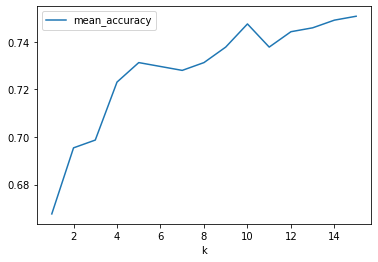

In [11]:
#Q.2. The following are the mean accuracy when k changes and its graph
mean_accuracy = get_accuracy(X_train, y_train)

In [17]:
import numpy as np

def calculate_test_error_rate(mean_accuracy, X_train, y_train, X_test, y_test):
    max_acc_fold = np.argmax(mean_accuracy) + 1
    neigh = KNeighborsClassifier(n_neighbors=max_acc_fold, metric="euclidean")
    neigh.fit(X_train, y_train.values.ravel())
    y_pred = neigh.predict(X_test)
    print("We chose k =", max_acc_fold, "with Test error : ",np.mean(y_pred != y_test))

In [18]:
#Q.3. This returns the test error for the k fold with maximum training accuracy 
calculate_test_error_rate(mean_accuracy, X_train, y_train, X_test, y_test)

We chose k = 15 with Test error :  0.24675324675324675


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tempX_train = scaler.fit_transform(X_train, y_train)
tempX_test = scaler.transform(X_test)

k =  1 , mean_accuracy= 0.700333200053312
k =  2 , mean_accuracy= 0.7117686258829802
k =  3 , mean_accuracy= 0.7394375583100093
k =  4 , mean_accuracy= 0.7280421164867387
k =  5 , mean_accuracy= 0.7410769025723044
k =  6 , mean_accuracy= 0.7377848860455818
k =  7 , mean_accuracy= 0.7377582300413168
k =  8 , mean_accuracy= 0.7312275089964014
k =  9 , mean_accuracy= 0.7507530321204852
k =  10 , mean_accuracy= 0.7507663601226175
k =  11 , mean_accuracy= 0.7475009996001599
k =  12 , mean_accuracy= 0.7605357856857257
k =  13 , mean_accuracy= 0.7589097694255631
k =  14 , mean_accuracy= 0.7459016393442622
k =  15 , mean_accuracy= 0.7442889510862323


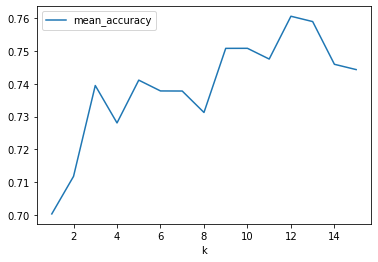

In [20]:
#Q.4. After centralization and standardization of the features, following is the new accuracy for each k
temp_mean_accuracy = get_accuracy(tempX_train, y_train)

In [23]:
#Q.4. centralization and standardization the accuracy has changed and the maximum accuracy is for k = 12
calculate_test_error_rate(temp_mean_accuracy, tempX_train, y_train, tempX_test, y_test)

We chose k = 12 with Test error :  0.24025974025974026
